In [1]:
from manim import *

video_scene = " -v WARNING --progress_bar None --disable_caching coriolis_earth_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s coriolis_earth_Scene"

In [44]:
class CoriolisEarth(Mobject):
    def __init__(self, center, xy_range, xy_length, **kwargs):
        super().__init__(**kwargs)
        
		

class CoriolisAx(Mobject):
	def __init__(self, center, omega_z_length, v_length, c_length, theta, c_angle, **kwargs):
		super().__init__(**kwargs)
        
		self.center = center
        
		omega_z_line = Line(start = self.center - omega_z_length*UP/2, end = self.center + omega_z_length*UP/2, color = BLACK, stroke_width = 4).add_tip(tip_length = 0.25, tip_width = 0.25)
		omega_z_line_label = Tex(r"$\Vec{\omega}$", color = BLACK).next_to(omega_z_line, UP+RIGHT, buff = 0.125)
		self.add(omega_z_line, omega_z_line_label)

Manim Community v0.18.1

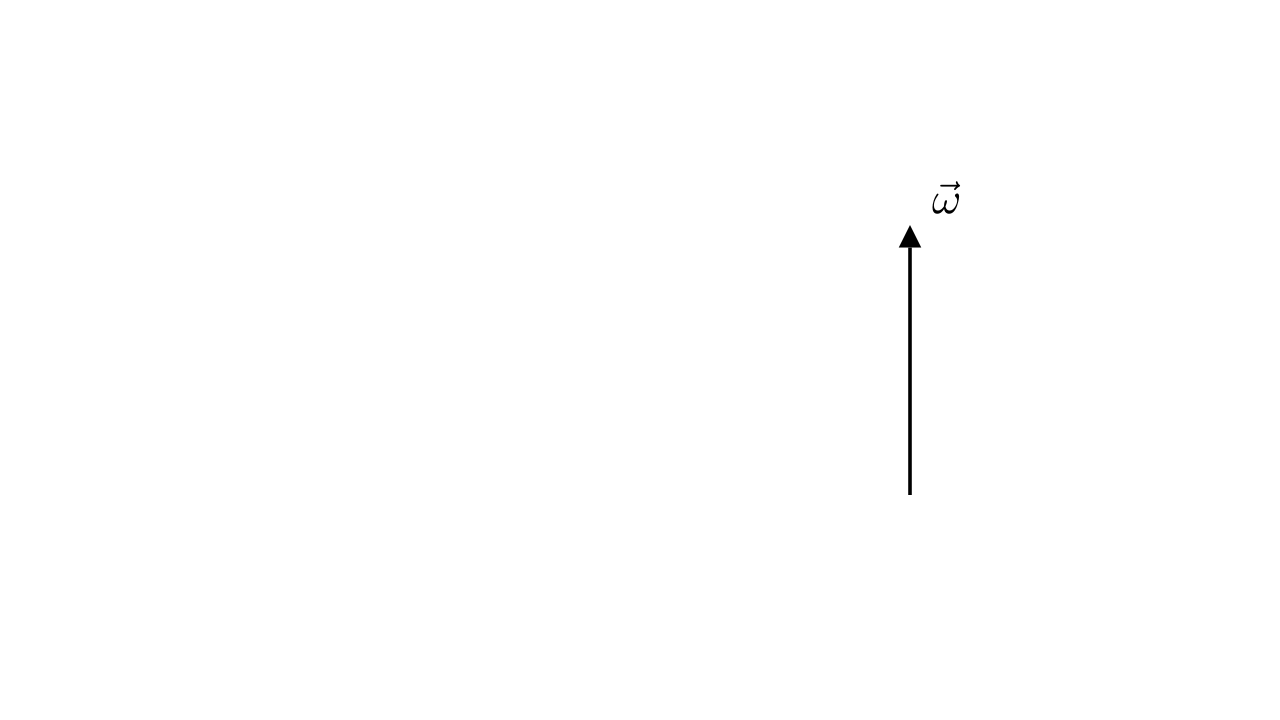

In [45]:
%%manim -qm --fps 60 $video_scene


class coriolis_earth_Scene(Scene):
	def construct(self):
		self.camera.background_color = WHITE

		ax_center = np.array([3, 0, 0])

		coriolis_ax = CoriolisAx(ax_center, 3, 2, 2, PI/4, PI/4)
		self.add(coriolis_ax)